In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-payment-fraud-detection/onlinefraud.csv


In [47]:
# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [48]:
data= pd.read_csv('/kaggle/input/online-payment-fraud-detection/onlinefraud.csv')

In [49]:
# Drop  rows randomly
random_rows = data.sample(n=5000000, random_state=42)  
data = data.drop(random_rows.index)
data = data.reset_index(drop=True)



In [50]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.00,0,0
1,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.00,0,0
2,1,DEBIT,9644.94,C1900366749,4465.0,0.00,C997608398,10845.0,157982.12,0,0
3,1,PAYMENT,1157.86,C1237762639,21156.0,19998.14,M1877062907,0.0,0.00,0,0
4,1,DEBIT,9302.79,C1566511282,11299.0,1996.21,C1973538135,29832.0,16896.70,0,0


In [51]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1362615,740,TRANSFER,1312694.50,C1681615431,1312694.50,0.00,C492082350,0.00,0.00,1,0
1362616,741,TRANSFER,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.00,0.00,1,0
1362617,741,CASH_OUT,10000000.00,C1668034607,10000000.00,0.00,C1250722530,192912.98,10192912.98,1,0
1362618,741,CASH_OUT,114149.44,C1235786818,114149.44,0.00,C1738374799,0.00,114149.44,1,0
1362619,742,CASH_OUT,303846.74,C1148860488,303846.74,0.00,C846260566,343660.89,647507.63,1,0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362620 entries, 0 to 1362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1362620 non-null  int64  
 1   type            1362620 non-null  object 
 2   amount          1362620 non-null  float64
 3   nameOrig        1362620 non-null  object 
 4   oldbalanceOrg   1362620 non-null  float64
 5   newbalanceOrig  1362620 non-null  float64
 6   nameDest        1362620 non-null  object 
 7   oldbalanceDest  1362620 non-null  float64
 8   newbalanceDest  1362620 non-null  float64
 9   isFraud         1362620 non-null  int64  
 10  isFlaggedFraud  1362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 114.4+ MB


In [53]:
data.shape

(1362620, 11)

In [54]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.362620e+06,1.362620e+06,1.362620e+06,1.362620e+06,1.362620e+06,1.362620e+06,1.362620e+06,1.362620e+06
mean,2.435557e+02,1.797494e+05,8.319421e+05,8.532500e+05,1.102088e+06,1.226472e+06,1.255669e-03,7.338803e-07
std,1.423721e+02,5.911377e+05,2.876708e+06,2.912864e+06,3.496073e+06,3.771217e+06,3.541318e-02,8.566681e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.340297e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.479127e+04,1.424900e+04,0.000000e+00,1.328544e+05,2.145921e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.086985e+05,1.074700e+05,1.446796e+05,9.412976e+05,1.108263e+06,0.000000e+00,0.000000e+00
max,7.420000e+02,6.173376e+07,4.381886e+07,4.368662e+07,3.555534e+08,3.555534e+08,1.000000e+00,1.000000e+00


In [55]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [56]:
data.type.value_counts()

CASH_OUT    478692
PAYMENT     461007
CASH_IN     299792
TRANSFER    114323
DEBIT         8806
Name: type, dtype: int64

In [57]:
data.type.unique()

array(['PAYMENT', 'DEBIT', 'CASH_OUT', 'TRANSFER', 'CASH_IN'],
      dtype=object)

In [58]:
import plotly.express as px

In [59]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(data, values=quantity, names=transactions, hole = 0.5, title="Distribution of Transaction Type")
figure.show()

<AxesSubplot: >

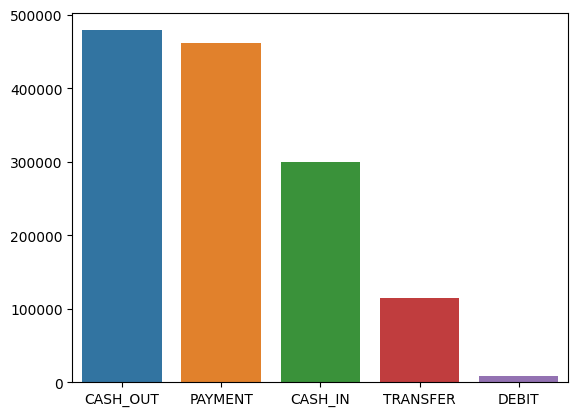

In [60]:
sns.barplot(x = data.type.value_counts().index, y = data.type.value_counts().values)


In [61]:
data["type"]= data["type"].replace({"CASH_OUT":1 ,"PAYMENT":2 , "CASH_IN":3 , "TRANSFER":4 , "DEBIT":5 })

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362620 entries, 0 to 1362619
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1362620 non-null  int64  
 1   type            1362620 non-null  int64  
 2   amount          1362620 non-null  float64
 3   nameOrig        1362620 non-null  object 
 4   oldbalanceOrg   1362620 non-null  float64
 5   newbalanceOrig  1362620 non-null  float64
 6   nameDest        1362620 non-null  object 
 7   oldbalanceDest  1362620 non-null  float64
 8   newbalanceDest  1362620 non-null  float64
 9   isFraud         1362620 non-null  int64  
 10  isFlaggedFraud  1362620 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 114.4+ MB


In [63]:
data.amount

0             11668.14
1              7107.77
2              9644.94
3              1157.86
4              9302.79
              ...     
1362615     1312694.50
1362616    10000000.00
1362617    10000000.00
1362618      114149.44
1362619      303846.74
Name: amount, Length: 1362620, dtype: float64

Text(0.5, 0, 'the amount of money')

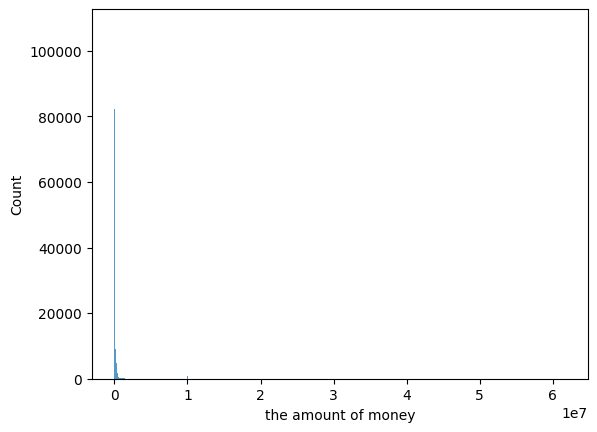

In [64]:
sns.histplot(data.amount)
plt.xlabel('the amount of money')


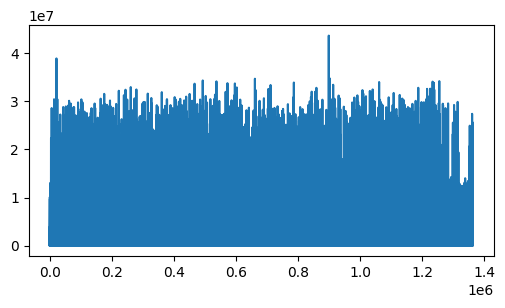

In [65]:
plt.figure(figsize = [6,3])
plt.plot(data.newbalanceOrig)
plt.show()

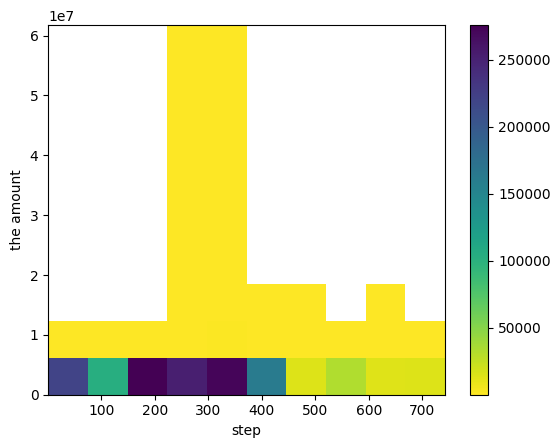

In [66]:
plt.hist2d(data= data, x = 'step', y = 'amount', cmin = 0.5,
    cmap = 'viridis_r' )
plt.colorbar()
plt.xlabel('step')
plt.ylabel('the amount')
plt.show()

In [67]:
correlation = data.corr()
print(correlation['isFraud'].sort_values(ascending=False))

/tmp/ipykernel_31/2758495956.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



isFraud           1.000000
amount            0.075241
step              0.031582
isFlaggedFraud    0.024160
type              0.014312
oldbalanceOrg     0.008917
newbalanceDest    0.002060
oldbalanceDest   -0.004336
newbalanceOrig   -0.008825
Name: isFraud, dtype: float64


/tmp/ipykernel_31/1738594488.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

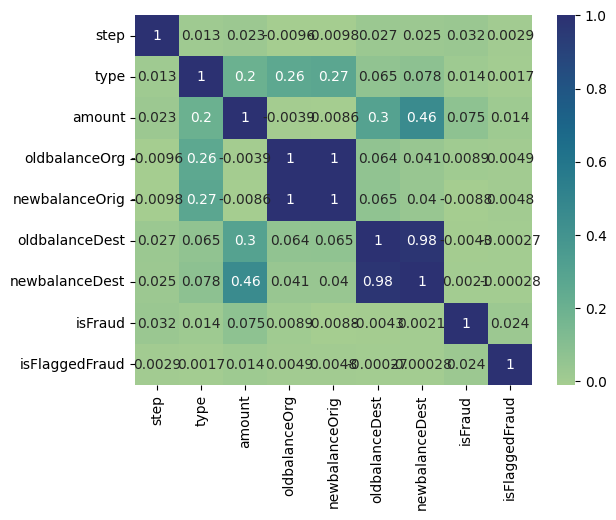

In [68]:
sns.heatmap(data.corr(), annot=True, cmap='crest')

In [69]:
data.drop(['nameDest','nameOrig','isFlaggedFraud'], axis=1 ,inplace=True)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362620 entries, 0 to 1362619
Data columns (total 8 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1362620 non-null  int64  
 1   type            1362620 non-null  int64  
 2   amount          1362620 non-null  float64
 3   oldbalanceOrg   1362620 non-null  float64
 4   newbalanceOrig  1362620 non-null  float64
 5   oldbalanceDest  1362620 non-null  float64
 6   newbalanceDest  1362620 non-null  float64
 7   isFraud         1362620 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 83.2 MB


In [71]:
from sklearn.model_selection import train_test_split
x= np.array(data[["step","type","amount","oldbalanceOrg","newbalanceOrig"]])
y= np.array(data[["isFraud"]])
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = RandomForestClassifier()
model4 = KNeighborsClassifier()

model1.fit(x_train,y_train.ravel())
model2.fit(x_train,y_train.ravel())
model3.fit(x_train,y_train.ravel())
model4.fit(x_train,y_train.ravel())


KNeighborsClassifier()

In [73]:
print('DecisionTreeClassifier:' ,model1.score(x_test,y_test))
print('LogisticRegression:' ,model2.score(x_test,y_test))
print('RandomForestClassifier:' ,model3.score(x_test,y_test))
print('KNeighborsClassifier:' ,model4.score(x_test,y_test))

DecisionTreeClassifier: 0.999368862925834
LogisticRegression: 0.9984331655193671
RandomForestClassifier: 0.9995119695879996
KNeighborsClassifier: 0.9994459203593078
